In [67]:
# This is just a notebook version of the cat vs dog script included.
# It makes it easier to see how the images are manipulated
# 8000 pics in training set, 2000 pics in test set

import matplotlib.pyplot as plt
import cv2

In [68]:
cat3 = cv2.imread('..Datasets/cat_dog_dataset/training_set/cats/cat.3.jpg')
cat3 = cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)

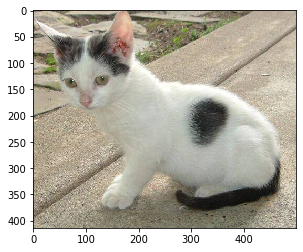

In [69]:
plt.imshow(cat4)

In [70]:
dog3 = cv2.imread('/Users/kieranodonnell/Documents/GitHub/Data Sci/Datasets/cat_dog_dataset/training_set/dogs/dog.3.jpg')
dog3 = cv2.cvtColor(dog3,cv2.COLOR_BGR2RGB)

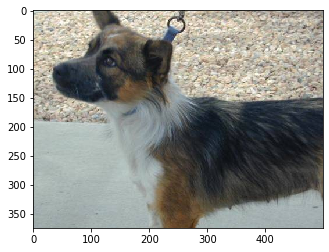

In [71]:
plt.imshow(dog3)

In [72]:
dog3.shape

(375, 499, 3)

In [73]:
# Prepare data for model
# Slight transformations can help alot

from keras.preprocessing.image import ImageDataGenerator

image_gen = ImageDataGenerator(rotation_range=30, # randomly rotate the image
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear crops away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

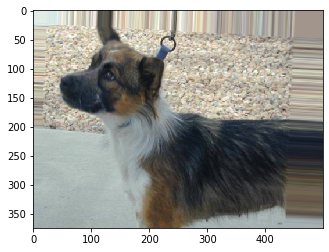

In [74]:
plt.imshow(image_gen.random_transform(dog3))

In [75]:
# Generate image flow - training
train_path = '/Users/kieranodonnell/Documents/GitHub/Data Sci/Datasets/cat_dog_dataset/training_set'
image_gen.flow_from_directory(train_path)

Found 8000 images belonging to 2 classes.


In [76]:
# Generate image flow - test
test_path = '/Users/kieranodonnell/Documents/GitHub/Data Sci/Datasets/cat_dog_dataset/test_set'
image_gen.flow_from_directory(test_path)

Found 2000 images belonging to 2 classes.


In [77]:
# Define custom input shape
input_shape = (150,150,3)

In [78]:
# Importing the model

from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D

In [79]:
# Building the model

model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (4,4), input_shape = input_shape, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(filters = 64, kernel_size = (4,4), input_shape = input_shape, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(filters = 64, kernel_size = (4,4), input_shape = input_shape, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy',
             optimizer = 'adam',
             metrics =['accuracy'])

In [80]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 147, 147, 64)      3136      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 70, 70, 64)        65600     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 64)        65600     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 16384)            

In [81]:
# Train the model with chosen batch size

batch_size = 32

training_image_gen = image_gen.flow_from_directory(train_path,
                                                  target_size=input_shape[:2],
                                                  batch_size = batch_size,
                                                  class_mode='binary')
test_image_gen = image_gen.flow_from_directory(test_path,
                                                  target_size=input_shape[:2],
                                                  batch_size = batch_size,
                                                  class_mode='binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [82]:
# Check class indeces

training_image_gen.class_indices

{'cats': 0, 'dogs': 1}

In [86]:
# Limit stesp per epoch for quicker running -> can be changed
results = model.fit_generator(training_image_gen,epochs = 1, 
                              steps_per_epoch = 200,
                             validation_data=test_image_gen,
                             validation_steps=36)

Epoch 1/1
200/200 [==============================] - 406s 2s/step - loss: 0.6988 - accuracy: 0.5172 - val_loss: 0.7020 - val_accuracy: 0.5642


In [89]:
# Evaluate - accuracy

results.history['accuracy']

[0.5171875]

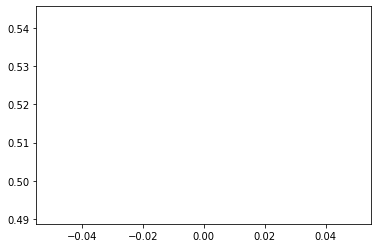

In [90]:
# Plot accuracy

plt.plot(results.history['accuracy'])

In [91]:
# If saving model is desired
# model.save('cat_dog_10epochs.h5')

In [95]:
# Predict on new images!

import numpy as np
from keras.preprocessing import image


cat_file_path = '/Users/kieranodonnell/Documents/GitHub/Data Sci/Datasets/cat_dog_dataset/single_prediction/cat_or_dog_2.jpg'

cat_img = image.load_img(cat_file_path, target_size=(150, 150))

cat_img = image.img_to_array(cat_img)

cat_img = np.expand_dims(cat_img, axis=0)
cat_img = cat_img/255

In [98]:
prediction_prob = model.predict(cat_img)

In [ ]:
# Check class indeces

training_image_gen.class_indices

In [103]:
# Output prediction
print(f'Probability that image is a cat is: {prediction_prob} ')

Probability that image is a cat is: [[0.59465367]] 


In [105]:
cat_or_dog = cv2.imread(cat_file_path)
cat_or_dog = cv2.cvtColor(cat_or_dog,cv2.COLOR_BGR2RGB)

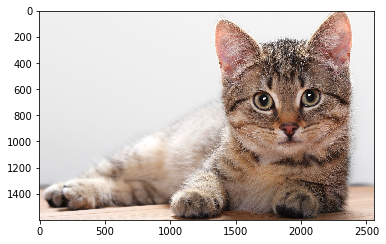

In [106]:
plt.imshow(cat_or_dog)